In [8]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse import csr_matrix

raiting = pd.read_csv('./ratings_drop.csv' , usecols=[ 'userId' , 'productId' , 'rating'] )
products = pd.read_csv('./products_join_categories.csv')
products = products.loc[:, ~products.columns.str.contains('^Unnamed')]
products.set_index( ['productId'] , inplace=True, drop=True )
products = products.rename({'name': 'product_name'}, axis='columns')
display(products.head())

,product_name,catIds,cat1,cat1_name,cat2,cat2_name,cat3,cat3_name
productId,,,,,,,,
0,CSSMs Biology: Control in Cells and in Organis...,"832,476,923",832,图书音像,476,其它图书,923.0,进口图书
1,Treasure Island,"832,1101,1086",832,图书音像,1101,少儿/教育图书,1086.0,少儿
2,Collins Primary Dictionaries – Collins Junior ...,"832,476,739",832,图书音像,476,其它图书,739.0,工具书
3,Partners in Crime,"832,476,923",832,图书音像,476,其它图书,923.0,进口图书
4,The Hobbit,"832,1101,1086",832,图书音像,1101,少儿/教育图书,1086.0,少儿


In [9]:
raiting.sample(10)
display(products.sample(10))

,product_name,catIds,cat1,cat1_name,cat2,cat2_name,cat3,cat3_name
productId,,,,,,,,
99284,幸福的提姆和莎兰(套装共10册),"832,1101,1086",832,图书音像,1101,少儿/教育图书,1086.0,少儿
322172,中国历代法书粹编:怀素草书卷,"832,519,1076",832,图书音像,519,文学艺术,1076.0,艺术
434201,世界文学名著典藏:安娜????卡列尼娜(全译插图本),"832,519,1",832,图书音像,519,文学艺术,1.0,小说
1292,18式太极剑(1VCD+1书),"1111,666,680",1111,运动户外,666,体育用品,680.0,跆拳道/武术/搏击
380600,犯罪学及刑罚学,"832,723,160",832,图书音像,723,人文社科类图书,160.0,法律
141546,VNC威尼斯 水晶灯客厅卧室灯具欧式蜡烛灯饰K9水晶吊灯 D6778 (D6778-8(不带罩)),"571,326,513",571,家具/家装/建材,326,灯具,513.0,其他灯具
6700,宠物医生手册(第2版),"832,665,742",832,图书音像,665,生活类图书,742.0,休闲/爱好
134414,台积电 宏碁 Acer BTP-AMJ1 ANJ1 AOJ1 APJ1 AQJ1 ARJ1 ...,"1057,24,851",1057,电脑/办公,24,笔记本/平板配件,851.0,笔记本配件
507443,酒神:天水城(第6卷),"832,519,402",832,图书音像,519,文学艺术,402.0,青春文学


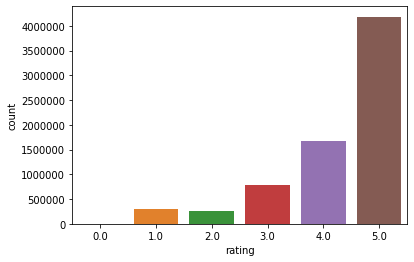

In [10]:
sns.countplot(data=raiting , x = 'rating' )
plt.show()

In [11]:
userRaitingCount = raiting['userId'].value_counts();
raitingFiltered = raiting[raiting['userId'].isin(userRaitingCount[userRaitingCount >= 50 ].index)]
print(raitingFiltered.shape)
print(raiting.shape)
productRaitingCount = raiting['productId'].value_counts();
raitingFiltered = raitingFiltered[raitingFiltered['userId'].isin(productRaitingCount[productRaitingCount >= 100 ].index)]
print(raitingFiltered.shape)

(1847803, 3)
(7202921, 3)
(35024, 3)


In [12]:
raitingFiltered.drop_duplicates(subset=['userId', 'productId'], keep='first' , inplace =True )
raitingFilteredPivot = raitingFiltered.pivot( index='productId' , columns='userId' , values="rating" ).fillna(0)

In [13]:
joinEdRaiting = pd.merge(products, raitingFiltered, on='productId', how='inner')

In [14]:
display(display(joinEdRaiting.sample(10)))

,productId,product_name,catIds,cat1,cat1_name,cat2,cat2_name,cat3,cat3_name,userId,rating
29934,462933,Life Without Limits: Inspiration for a Ridicul...,"832,476,923",832,图书音像,476,其它图书,923.0,进口图书,2277.0,5.0
13801,216071,SYT 盛亚特 夏季新款男士休闲短袖T恤男式韩版修身圆领t恤 1436,"802,799,707",802,服饰服装,799,男装,707.0,T恤,5226.0,5.0
28163,436991,金属学与热处理(第2版),"832,1101,379",832,图书音像,1101,少儿/教育图书,379.0,教材,270.0,5.0
1656,23308,诺基亚BH-106原装领夹式蓝牙耳机(09新款),"1128,246,475",1128,手机/数码,246,手机配件,475.0,蓝牙耳机,5226.0,4.0
18982,298051,中学英语阶梯阅读2,"832,1101,374",832,图书音像,1101,少儿/教育图书,374.0,中小学教辅,5693.0,5.0
15133,235432,漂流瓶绘本馆:我讨厌读书,"832,1101,1086",832,图书音像,1101,少儿/教育图书,1086.0,少儿,103567.0,3.0
20117,317266,名著名译插图本????精华版:神曲(套装共3册),"832,519,599",832,图书音像,519,文学艺术,599.0,文学类,51660.0,5.0
16060,250682,TCL BCD-211KD3 211升双门冰箱(闪白银),"222,958,454",222,家用电器,958,大家电,454.0,冰箱,47.0,5.0
28300,438459,家常主料100种做法丛书:肉的100种做法,"832,665,1048",832,图书音像,665,生活类图书,1048.0,烹饪/美食,96002.0,5.0
9582,148470,成绩单,"832,519,1",832,图书音像,519,文学艺术,1.0,小说,220617.0,4.0


None

In [15]:
#user based:
raitingFilteredMatrix = csr_matrix(raitingFilteredPivot.values)
model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(raitingFilteredMatrix)
NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine', metric_params=None, n_jobs=1, n_neighbors=5, p=2, radius=1.0)

#489000->productId
queryIndex = raitingFilteredPivot.index.get_loc(231449)
# queryIndex = np.random.choice(raitingFilteredPivot.shape[0])
distances, indices = model_knn.kneighbors(raitingFilteredPivot.iloc[queryIndex, :].values.reshape(1, -1), n_neighbors=6)

print('Recommendations for {0} ( {1} | {2} | {3} :\n'.format( products.iloc[raitingFilteredPivot.index[queryIndex]].product_name ,
                                                                     products.iloc[raitingFilteredPivot.index[queryIndex]].cat1_name,
                                                                     products.iloc[raitingFilteredPivot.index[queryIndex]].cat2_name,
                                                                     products.iloc[raitingFilteredPivot.index[queryIndex]].cat3_name))

for i in range(0, len(distances.flatten())):
        print('{0}: {1} ( {2} | {3} | {4} ) , with distance of {5}:'.format(i,
                                                                           products.iloc[raitingFilteredPivot.index[indices.flatten()[i]]].product_name ,
                                                                           products.iloc[raitingFilteredPivot.index[indices.flatten()[i]]].cat1_name,
                                                                           products.iloc[raitingFilteredPivot.index[indices.flatten()[i]]].cat2_name,
                                                                           products.iloc[raitingFilteredPivot.index[indices.flatten()[i]]].cat3_name,
                                                                           distances.flatten()[i]))

Recommendations for 致我们终将逝去的青春(附"致青春"珍藏卡册) ( 图书音像 | 文学艺术 | 青春文学 :

0: 致我们终将逝去的青春(附"致青春"珍藏卡册) ( 图书音像 | 文学艺术 | 青春文学 ) , with distance of 0.0:
1: 致我们终将逝去的青春(典藏版) ( 图书音像 | 文学艺术 | 青春文学 ) , with distance of 0.3859923880002929:
2: 星火英语:真题详解+标准预测6级(附CD-ROM+词汇卡片) ( 图书音像 | 少儿/教育图书 | 考试 ) , with distance of 0.5521889244801009:
3: Edifier漫步者 R1200T 2.0声道音箱(木色 丝膜球顶高音,4英寸低音扬声器) ( 电脑/办公 | 外设产品 | 电脑音箱 ) , with distance of 0.554815405055026:
4: 致我们终将逝去的青春 ( 图书音像 | 文学艺术 | 青春文学 ) , with distance of 0.5799159747915971:
5: 别笑!我是英文单词书(全彩图文本)(随书附赠390分钟1、2、3.4英汉双语朗读光盘!) ( 图书音像 | 少儿/教育图书 | 外语 ) , with distance of 0.6059787862023847:
